## 1. Variational Inference for Gaussian Mixture Models

We can now return to the example of Gaussian Mixture Models (GMMs) from Tutorial 1 and apply variational inference to learn posteriors for each of the parameters.  

The derivations and layout follow *Pattern Recognition and Machine Learning* by Chris Bishop (https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).

The likelihoods for the observed and latent variables for GMMs are
\begin{aligned}
p(Z | \pi) &= \prod_{n=1}^N \prod_{k=1}^K \pi_k^{z_{nk}} \\
p(X | Z, \mu, \Lambda) &= \prod_{n=1}^N\prod_{k=1}^K N(x_n | \mu_k, \Lambda_k^{-1})^{z_{nk}}
\end{aligned}

Assume that $x_n\in\mathbb{R}^D$.


We now need to introduce priors on $\pi, \mu$ and $\Lambda$.  We will assume conjugate distributions:
\begin{aligned}
p(\pi) &= \mbox{Dirichlet}(\pi | \alpha_0) = C(\alpha_0) \prod_{k=1}^K \pi_k^{\alpha_0 - 1} \\
p(\mu, \Lambda) &= p(\mu | \Lambda)p(\Lambda) = \prod_{k=1}^K N\left(\mu_k | m_0, (\beta_0\Lambda_k)^{-1}\right)\mbox{Wishart}\left(\Lambda_k | W_0, \nu_0\right)
\end{aligned}

The joint distribution is
$$p(X, Z, \pi, \mu, \Lambda) = p(X|Z, \mu, \Lambda)p(Z | \pi)p(\pi)p(\mu | \Lambda)p(\Lambda),$$
and the assumed variational distribution (using the mean field approximation) is:
$$q(Z, \pi, \mu, \Lambda) = q(Z)q(\pi, \mu, \Lambda).$$

Then, we can proceed to find the optimal forms of each term in $q$, starting with $q(Z)$. Any terms that don't involve $Z$ can be absorbed into the constant term. Full derivations are presented in Appendix A below and the results are stated here.

The variational posterior is optimized through the iteration of a variational E-step and a variational M-step.

**Variational E-step:** Evaluate moments using current model parameter distributions

\begin{aligned}
\mathbb{E}_{\mu_k, \Lambda_k}\left((x_n - \mu_k)^T\Lambda_k (x_n - \mu_k)\right) &= D\beta_k^{-1} + \nu_k(x_n - m_k)^TW_k(x_n - m_k) \\
\log\tilde{\Lambda}_k &= \mathbb{E}\log|\Lambda_k| = \sum_{i=1}^D \psi\left(\dfrac{\nu_k + 1 - i}{2}\right) + D\log2 + \log |W_k| \\
\log\tilde{\pi}_k &= \mathbb{E}\log\pi_k = \psi(\alpha_k) - \psi\left(\sum_k\alpha_k\right) \\
\mathbb{E}(z_{nk}) = r_{nk} &\propto \tilde{\pi}_k\tilde{\Lambda_k}^{1/2}\mbox{exp}\left(-\dfrac{D}{2\beta_k} - \dfrac{\nu_k}{2}(x_n - m_k)^TW_k(x_n - m_k)\right)
\end{aligned}

**Variational M-Step:** Keep the values of $r_{nk}$ fixed (which are analogous to the $\gamma(z_{nk})$ values in the EM algorithm) and update the variational parameter distributions

\begin{aligned}
q^*(\pi) &= \mbox{Dirichlet}(\pi |\alpha) \\
\alpha_k &= \alpha_0 + N_k \\
q^*(\mu_k,\Lambda_k) &= N(\mu_k | m_k, (\beta_k\Lambda_k)^{-1})\mbox{Wishart}(\Lambda_k | W_k, \nu_k) \\
\beta_k &= \beta_0 + N_k \\
m_k &= \dfrac{1}{\beta_k}\left(\beta_0m_0 + N_k\bar{X}_k\right) \\ 
W_k^{-1} &= W_0^{-1} + N_kS_k + \dfrac{\beta_0N_k}{\beta_0 + N_k}(\bar{X}_k - m_0)(\bar{X}_k - m_0)^T\\
\nu_k &= \nu_0 + N_k
\end{aligned}

\begin{aligned}
N_k &= \sum_{n=1}^N r_{nk} \\
\bar{X}_k &= \dfrac{1}{N_k} \sum_{n=1}^N r_{nk}x_n \\
S_k &= \dfrac{1}{N_k}\sum_{n=1}^N r_{nk}(x_n - \bar{X}_k)(x_n - \bar{X}_k)^T
\end{aligned}

**Variational Lower Bound:** 
\begin{aligned}
L &= \sum_z \int\int\int q(Z, \pi, \mu, \Lambda)\log\left(\dfrac{p(X, Z, \pi, \mu, \Lambda)}{q(Z, \pi, \mu, \Lambda)}\right)d\pi d\mu d\Lambda \\
&= \mathbb{E}\log p(X|Z, \mu, \Lambda) + \mathbb{E}\log p(Z|\pi) + \mathbb{E}\log p(\pi) + \mathbb{E}\log p(\mu, \Lambda) - \mathbb{E}\log q(Z) - \mathbb{E} \log q(\pi) - \mathbb{E}\log q(\mu, \Lambda) \\
\mathbb{E}\log p(X|Z, \mu, \Lambda) &= \dfrac{1}{2}\sum_{k=1}^K N_k\left(\log \tilde{\Lambda}_k - D\beta_k^{-1} - \nu_ktr(S_kW_k) - \nu_k(\bar{X}_k - m_k)^TW_k(\bar{X}_k - m_k) - D\log (2\pi)\right) \\
\mathbb{E}\log p(Z|\pi) &= \sum_{n=1}^N\sum_{k=1}^K r_{nk}\log\tilde{\pi}_k \\
\mathbb{E}\log p(\pi) &= \log C(\alpha_0) + (\alpha_0 - 1)\sum_{k=1}^K \log \tilde{\pi}_k \\
\mathbb{E}\log p(\mu, \Lambda) &= \frac{1}{2}\sum_{k=1}^K\left(D\log(\beta_0/2\pi) + \log\tilde{\Lambda}_k - \dfrac{D\beta_0}{\beta_k} - \beta_0\nu_k(m_k - m_0)^TW_k(m_k - m_0)\right)  \\
& \enspace\enspace + K\log B(W_0, \nu_0) + \dfrac{\nu_0 - D - 1}{2}\sum_{k=1}^K \log\tilde{\Lambda}_k - \dfrac{1}{2}\sum_{k=1}^K\nu_ktr(W_0^{-1}W_k) \\
\mathbb{E}\log q(Z) &= \sum_{n=1}^N\sum_{k=1}^K r_{nk}\log r_{nk} \\
\mathbb{E} \log q(\pi) &= \sum_{k=1}^K (\alpha_k - 1)\log\tilde{\pi}_k + \log C(\alpha) \\
\mathbb{E}\log q(\mu, \Lambda) &= \sum_{k=1}^K\left(\frac{1}{2}\log\tilde{\Lambda}_k + \frac{D}{2}\log\left(\dfrac{\beta_k}{2\pi}\right) - \frac{D}{2} - H\left(q(\Lambda_k)\right)\right) \\
H\left(q(\Lambda_k)\right) &= -\log B(W_k, \nu_k) - \dfrac{\nu_k - D - 1}{2}\mathbb{E}\log|\Lambda_k| + \frac{\nu D}{2} \\
C(\alpha) &= \dfrac{\Gamma\left(\sum_k \alpha_k\right)}{\Gamma (\alpha_1)\ldots\Gamma(\alpha_k)} \\
B(W, \nu) &= |W|^{-\nu/2}\left(2^{\nu D/2}\pi^{D(D-1)/4}\prod_{i=1}^D \Gamma\left(\dfrac{\nu + 1 - i}{2}\right)\right)^{-1} \\
\mathbb{E}\log|\Lambda_k| &= \sum_{i=1}^D \psi\left(\dfrac{\nu + 1 - i}{2}\right) + D\log 2 + \log |W_k| \\
\end{aligned}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats
from scipy.stats import multivariate_normal

iris = datasets.load_iris()

In [34]:
X = iris.data
y = iris.target

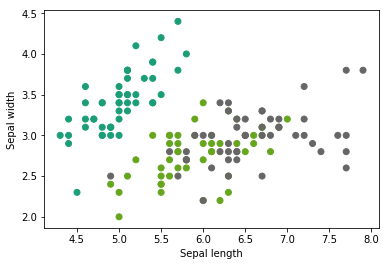

In [35]:
# Plot the data - work with Sepal Width and Sepal Length only
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
pass

In [4]:
def B(D, W, nu): ## helper function for Wishart constant
    ## Returns log of B
    result = -nu/2*np.log(np.linalg.det(W)) - (nu*D/2)*np.log(2) - (D*(D-1)/4)*np.log(np.pi) - \
            np.sum([np.log(scipy.special.gamma((nu+1-k)/2)) for k in range(1,D+1)])
#     result = np.linalg.det(W)**(-nu/2)*1/(2**(nu*D/2)*np.pi**(D*(D-1)/4)*\
#                                             np.prod([scipy.special.gamma((nu+1-k)/2) for k in range(1,D)]))
    return(result)

def C_alpha(alpha): ## Helper function for Dirichlet constant
    result = scipy.special.gamma(np.sum(alpha))/np.prod([scipy.special.gamma(alpha[k]) for k in range(K)])
    return(result)

def HqLambda(D, W, nu):
    E_lambda = np.sum(scipy.special.psi([(nu+1-i)/2 for i in range(1, D+1)])) + D*np.log(2) + np.log(np.linalg.det(W))
    result = -B(D, W, nu) - (nu-D-1)/2*E_lambda + nu*D/2
    return(result)

def psi_sum(D, nu):
    result = np.sum([scipy.special.psi((nu+1-k)/2) for k in range(1,D+1)])
    return(result)

def logSumExp(a):
    if np.all(np.isinf(a)):
        return np.log(0)
    else:
        b = np.max(a)
        return(b + np.log(np.sum(np.exp(a-b))))

In [5]:
# Calculate the variational lower bound to check for convergence
# Lambda_tk and pi_tk are already on the log scale
def lower_bound(K, D, rnk, Nk, Xk, Sk, mk, betak, nuk, Wk, alphak, pi_tk, Lambda_tk, prior):
    alpha0, beta0, m0, nu0, W0 = prior
    
    ## terms in same order as derivation above
    term1 = 0.5*np.sum([Nk[k]*(Lambda_tk[k] - D*1/betak[k] - nuk[k]*np.trace(np.dot(Sk[k], Wk[k])) - \
                           nuk[k]*np.dot((Xk[:,k] - mk[:, k]).T, np.dot(Wk[k], (Xk[:, k] - mk[:, k]))) \
                               - D*np.log(2*np.pi)) for k in range(K)])
    
    term2 = np.sum(np.dot(rnk, pi_tk))
    
    term3 = np.log(C_alpha(np.repeat(alpha0, K))) + (alpha0 - 1)*np.sum(pi_tk)
    
    term4 = 0.5*np.sum([D*np.log(beta0/(2*np.pi)) + Lambda_tk[k] - D*beta0/betak[k] -\
                      beta0*nuk[k]*np.dot(mk[:,k] - 0, np.dot(Wk[k], mk[:, k]-m0)) for k in range(K)]) + \
                        K*B(D, W0, nu0) + \
                        (nu0-D-1)/2*np.sum(Lambda_tk) - \
                        0.5*np.sum([nuk[k]*np.trace(np.dot(np.linalg.inv(W0), Wk[k])) for k in range(K)])
    
    term5 = np.sum(rnk*np.log(rnk))
    
    term6 = np.sum((alphak-1)*pi_tk) + np.log(C_alpha(alphak))
    
    term7 = np.sum([0.5*Lambda_tk[k] + D/2*np.log(betak[k]/(2*np.pi)) - D/2 - HqLambda(D, Wk[k], nuk[k]) \
                        for k in range(K)]) 
#     print(term1, term2, term3, term4, term5, term6, term7)
    lb = term1 + term2 + term3 + term4 - term5 - term6 - term7
    return(lb)

In [6]:
## X is the data
## K is the number of latent clusters
## crit is convergence criteria
## priors = [alpha0, beta0, m0, nu0, W0] are the prior values
def VI_GMM(X, K, priors, crit):
    N, D = X.shape ## number of data points and number of Gaussian dimensions
    alpha0, beta0, m0, nu0, W0 = priors
    
    # Randomly initialize starting values
    pi = np.random.rand(K)
    pi = pi/np.sum(pi) ## mixing proportions
    m = np.repeat(np.mean(X, axis =0).reshape(D,1), K, axis = 1) + np.random.rand(D,K)/3 ## means
    Lambda = np.zeros(K)
    W = [np.eye(D) for i in range(K)] ## covariance
    alpha = np.ones(K)
    nu = 10*np.ones(K)
    beta = np.ones(K)
    
    
    # Initialize data structures
    ll_old = 10E10
    ll_new = 0
    converge = 10E10 # current difference in log likelihoods to check for convergence
    
    Nk = np.zeros(K)
    Xk = np.zeros(shape = (D, K))
    Sk = [np.eye(D) for i in range(K)]
    rnk = np.zeros((N, K))
    
    while converge > crit:

        ## (1).  E-Step 
        Lambda = np.array([psi_sum(D, nu[k]) + D*np.log(2) + np.log(np.linalg.det(W[k])) for k in range(K)])
        pi = np.array([scipy.special.psi(alpha[k]) - scipy.special.psi(np.sum(alpha)) for k in range(K)])

        for i in range(N):
            gt = [pi[k] + 1/2*(Lambda[k]) -D/(2*beta[k]) - nu[k]/2*np.dot(np.dot((X[i,:] - m[:,k]).T, W[k]), 
                                                                                        X[i,:] - m[:,k]) for k in range(K)]
        #     gt = np.exp(gt/np.sum(gt))
            temp = np.exp(gt - logSumExp(gt)) + 0.001
            ## Apply Smoothing
            rnk[i, :] = temp/np.sum(temp)

        # ## (2). M-Step
        Nk = np.sum(rnk, axis = 0)
        Xk = np.dot(X.transpose(), rnk)/Nk 
        for k in range(K):
            Sk[k] = sum([rnk[i, k]*np.outer(X[i,:] - Xk[:, k], 
                                               (X[i,:] - Xk[:, k]).transpose()) for i in range(N)])/Nk[k]
        
        ## Update parameters
        alpha = alpha0 + Nk
        beta = beta0 + Nk
        m = 1/beta *(beta0*m0.reshape(D,1) + Nk*Xk)
        Wk_inv = [np.linalg.inv(W0) + Nk[k]*Sk[k] + \
          (beta0*Nk[k])/(beta0 + Nk[k])*np.dot(Xk[:, k] - m0, (Xk[:, k] - m0).T) for k in range(K)]
        W = np.linalg.inv(Wk_inv)
        nu = nu0 + Nk
        
    
        ## Check convergence criteria
        ll_new = lower_bound(K, D, rnk, Nk, Xk, Sk, m, beta, nu, W, alpha, pi, Lambda, priors)
        converge = abs(ll_new - ll_old)
        ll_old = ll_new
        #print(converge)
        
        
    ## Return cluster assignments
    Z = np.argmax(rnk, axis = 1)
    return(alpha, beta, m, W, nu, Z)


In [7]:
K = 5
N, D = X.shape
alpha0 = 1
beta0 = 1
m0 = np.ones(D)
nu0 = D+2
W0 = np.eye(D)
priors = [alpha0, beta0, m0, nu0, W0]
crit = 0.0001
alpha, beta, m, W, nu, Z = VI_GMM(X, K, priors, crit)

In [8]:
Z

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

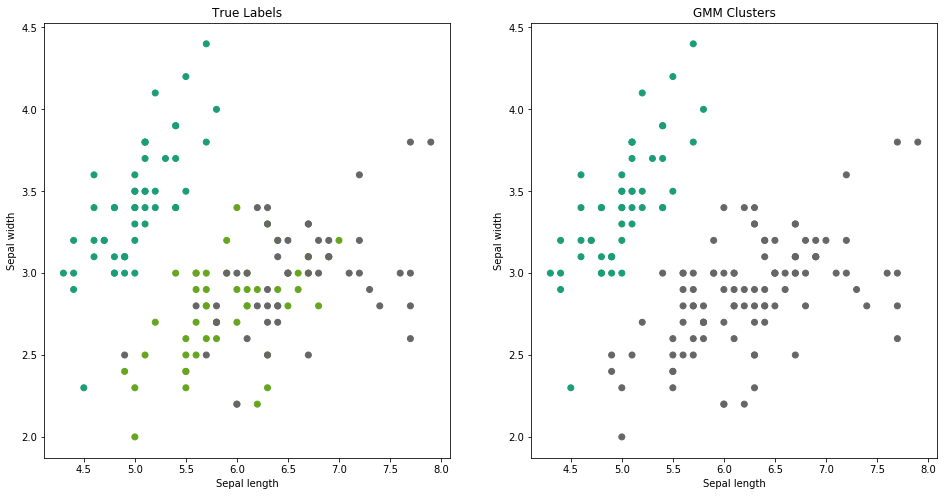

In [9]:
# Plot the data - work with Sepal Width and Sepal Length only
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('True Labels')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=Z, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("GMM Clusters")
pass

Bayesian approach is able to select the number of clusters, for this data, 2 clusters is appropriate.

## 2. MCMC for Gaussian Mixture Models

We can also perform posterior inference for the Gaussian mixture model using Markov Chain Monte Carlo. If we use the conjugate priors specified above for the Variational Inference derivation, we can use Gibbs sampling and easily derive the full conditionals necessary.  This derivation references http://halweb.uc3m.es/esp/Personal/personas/causin/eng/2011-2012/Bayes/chapter_12.pdf. 

The probability that a data point is asigned to cluster $k$ is $\pi_k$, and we again have that $z_{nk}$ is an indicator for the cluster for point $x_n$, $\mu_k$ is the mean of cluster $k$ and $\Lambda_k$ is the precision matrix for cluster $k$.


The likelihood and priors for the GMM are:

\begin{aligned}
p(Z | \pi) &= \prod_{n=1}^N\prod_{k=1}^K \pi_k^{z_{nk}} \\
p(X | Z, \mu, \Lambda) &= \prod_{n=1}^N\prod_{k=1}^K N(X_n | \mu_k, \Lambda_k^{-1})^{z_{nk}} \\
p(\pi) &= \mbox{Dirichlet}(\pi |\alpha_0) = C(\alpha_0)\prod_{k=1}^K \pi_k^{\alpha_0 - 1} \\
p(\mu, \Lambda) &= \prod_{k=1}^K N\left(\mu_k | m_0, \left(\beta_0\Lambda_k\right)^{-1}\right)\mbox{Wishart}\left(\Lambda_k | W_0, \nu_0\right) \\
\end{aligned}

Then, we have that the posterior distribution can be written as:

\begin{aligned}
p(Z, \pi, \mu, \Lambda) &\propto p(X | Z, \mu, \Lambda)p(Z|\pi)p(\pi)p(\mu, \Lambda) \\
 &\propto \prod_{n=1}^N\prod_{k=1}^K \pi_k^{z_{nk}}N\left(X_n |\mu_k, \Lambda_k^{-1}\right)^{z_{nk}}C(\alpha_0)\pi_k^{\alpha_0 - 1}N\left(\mu_k | m_0, \left(\beta_0\Lambda_k\right)^{-1}\right)\mbox{Wishart}\left(\Lambda_k | W_0, \nu_0\right) \\
 &\propto \prod_{n=1}^N\prod_{k=1}^K \pi_k^{z_{nk} + \alpha_0 - 1}N\left(X_n |\mu_k, \Lambda_k^{-1}\right)^{z_{nk}}N\left(\mu_k | m_0, \left(\beta_0\Lambda_k\right)^{-1}\right)\mbox{Wishart}\left(\Lambda_k | W_0, \nu_0\right) \\
\end{aligned}

We can identify the complete conditionals for Gibbs sampling as:

\begin{aligned}
p(z_{nk} = 1 |X, \pi, \mu, \Lambda) &= \dfrac{\pi_k N\left(x_n | \mu_k, \Lambda_k^{-1}\right)}{\sum_{j}\pi_j N\left(x_n | \mu_j, \Lambda_j^{-1}\right)} \\
p(\pi | X, \pi, \mu, \Lambda, Z) &= \mbox{Dirichlet}(\alpha_0 + N_k), \enspace N_k = \mbox{Number of } z_{nk} = 1 \\
p(\mu_k, \Lambda_k | X, Z, \pi) &= N\left(\mu_k | m_k, (\beta_k\Lambda_k)^{-1}\right)\mbox{Wishart}\left(\Lambda_k | W_k, \nu_k\right) \\
\beta_k &= \beta_0 + N_k \\
m_k &= \dfrac{\beta_0m_0 + N_k\bar{X}_k}{\beta_0 + N_k} \\
\nu_k &= \nu_0 + N_k \\
W_k^{-1} &= W_0^{-1} + \sum_{n=1}^N\left(x_n - \bar{X}_k\right)\left(x_n - \bar{X}_k\right)^T + \dfrac{N_k\beta_0}{N_k + \beta_0}\left(\bar{X}_k - m_0\right)\left(\bar{X}_k - m_0\right)^T \\
\end{aligned}

These full conditionals look very similar to the variational M-step updates.  To perform Gibbs sampling, we iteratively cycle through sampling from each of these full conditionals for a specified number of iterations.  Once the Markov Chain converges, these samples can be considered draws from the true posterior.

In [36]:
## X is the data
## K is the number of latent clusters
## it is the number of iterations to run the MCMC
## priors = [alpha0, beta0, m0, nu0, W0] are the prior values
def MCMC_GMM(X, K, priors, it):
    N, D = X.shape ## number of data points and number of Gaussian dimensions
    alpha0, beta0, m0, nu0, W0 = priors
    
    # Randomly initialize starting values
    pi = np.random.rand(K)
    pi = pi/np.sum(pi) ## mixing proportions
    mu = np.repeat(np.mean(X, axis =0).reshape(D,1), K, axis = 1) + np.random.rand(D,K)/3 ## means
    Lambda_inv = [np.eye(D) for i in range(K)] ## precision matrix
    W = [np.eye(D) for i in range(K)] ## covariance hyperparameter
    nu = 5*np.ones(K)
    beta = np.ones(K)
    
    
    # Initialize data structures
    Nk = np.zeros(K)
    X_bar = np.zeros((D, K))
    Z = np.zeros(shape = (N, K))
    
    for t in range(it):
        ## Sample Z
        for i in range(N):
            ## Apply smoothing
            gt = [pi[k]*multivariate_normal.pdf(X[i,:], mu[:, k], Lambda_inv[k])+ 0.001 for k in range(K)] 
            gamma = gt/np.sum(gt)
            Z[i, :] = np.random.multinomial(1, gamma)
        
        ## Update pi
        Nk = np.sum(Z, axis = 0)
        pi = np.random.dirichlet(alpha0 + Nk)
        
        
        ## Calculate X_bar_k, mean of data points assigned to cluster k
        ind = [np.where(Z[i, :] == 1)[0] for i in range(K)]
        X_bar = np.array([np.mean(X[ind[i], ], axis = 0) for i in range(K)])
        
        ## Update mu and Lambda
        beta = beta0 + Nk
        m = np.array([(beta0*m0 + Nk[k]*X_bar[k, :])/(beta0 + Nk[k]) for k in range(K)])
        nu = nu0 + Nk
        
        for k in range(K):
            W[k] = np.linalg.inv(W0) +  sum([np.outer(X[i,:] - X_bar[k, :], 
                                               (X[i,:] - X_bar[k, :]).T) for i in range(N)]) + \
                         Nk[k]*beta0/(Nk[k] + beta0)*np.outer(X_bar[k, :] - m0, (X_bar[k, :] - m0).T)
            Lambda_inv[k] = scipy.stats.invwishart(nu[k], W[k]).rvs()
            mu[:, k] = multivariate_normal.rvs(m[k, :], 1/beta[k]*Lambda_inv[k])
    
    if t%100 == 0:
        print(t)
        
        
        
        
    ## Return cluster assignments
    Z = np.argmax(Z, axis = 1)
    return(Z, pi, mu, Lambda_inv)


In [37]:
K = 3
N, D = X.shape
alpha0 = 1
beta0 = 1
m0 = np.ones(D)
nu0 = D+2
W0 = np.eye(D)
priors = [alpha0, beta0, m0, nu0, W0]
it = 1000
Z, pi, mu, Lambda_inv = MCMC_GMM(X, K, priors, it)

In [38]:
Z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

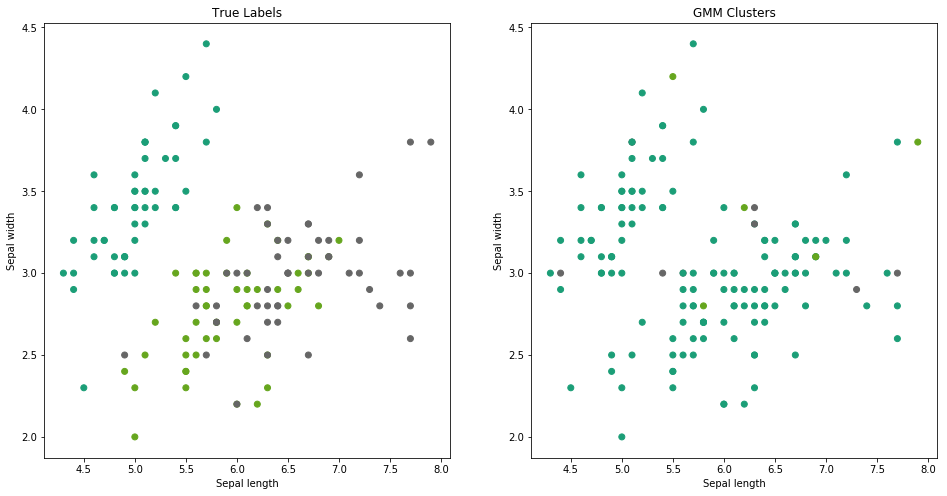

In [39]:
# Plot the data - work with Sepal Width and Sepal Length only
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('True Labels')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=Z, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("GMM Clusters")
pass

## Appendix A: Derivation of Variational Inference Equations


The joint distribution is
$$p(X, Z, \pi, \mu, \Lambda) = p(X|Z, \mu, \Lambda)p(Z | \pi)p(\pi)p(\mu | \Lambda)p(\Lambda),$$
and the assumed variational distribution (using the mean field approximation) is:
$$q(Z, \pi, \mu, \Lambda) = q(Z)q(\pi, \mu, \Lambda).$$

Then, we can proceed to find the optimal forms of each term in $q$, starting with $q(Z)$. Any terms that don't involve $Z$ can be absorbed into the constant term. 


\begin{aligned}
\log q^*(Z) &= \mathbb{E}_{\pi, \mu, \Lambda} \left(\log p(X, Z, \pi, \mu, \Lambda)\right) + const. \\
&= \mathbb{E}_{\pi, \mu, \Lambda}\left(\log \left(p(X|Z, \mu, \Lambda)p(Z | \pi)p(\pi)p(\mu | \Lambda)p(\Lambda)\right)\right) + const. \\
&= \mathbb{E}_{\pi}\left(\log p(Z | \pi)\right) + \mathbb{E}_{\mu, \Lambda}\left(\log p(X | Z, \mu, \Lambda)\right) + const. \\
&= \mathbb{E}_{\mu}\left(\log\left(\prod_{n=1}^N\prod_{k=1}^K \pi_k^{z_{nk}}\right)\right) + \mathbb{E}_{\mu, \Lambda}\left(\prod_{n=1}^N\prod_{k=1}^K N(x_n | \mu_k, \Lambda_k^{-1})^{z_{nk}}\right) + const. \\
&= \mathbb{E}_{\pi}\left(\sum_{n=1}^N\sum_{k=1}^K z_{nk}\log \pi_k\right) + \mathbb{E}_{\mu, \Lambda}\left(\sum_{n=1}^N\sum_{k=1}^K z_{nk}\log N(x_n | \mu_k, \Lambda_k^{-1})\right) + const. \\
&= \sum_{n=1}^N\sum_{k=1}^K z_{nk}\left(\mathbb{E}_{\pi}\log\pi_k + \mathbb{E}_{\mu, \Lambda}\log\left(|2\pi\Lambda_k^{-1}|^{-1/2}\mbox{exp}\left(-\frac{1}{2}(x_n - \mu_k)^T\Lambda_k(x_n - \mu_k)\right)\right)\right) + const. \\
&= \sum_{n=1}^N\sum_{k=1}^K z_{nk}\left(\mathbb{E}_{\pi}\log\pi_k -\frac{D}{2}\log(2\pi) + \frac{1}{2}\mathbb{E}\left(\log |\Lambda_k|\right) - \frac{1}{2}\mathbb{E}_{\mu_k, \Lambda_k}\left((x_n - \mu_k)^T\Lambda_k(x_n - \mu_k)\right)\right) + const. \\
\implies \log q^*(Z) &= \sum_{n=1}^N\sum_{k=1}^K z_{nk}\log \rho_{nk} + const. \\
\log \rho_{nk} &= \mathbb{E}\log\pi_k + \frac{1}{2}\mathbb{E}\log|\Lambda_k| - \frac{D}{2}\log(2\pi) - \frac{1}{2}\mathbb{E}_{\mu_k, \Lambda_k}\left((x_n - \mu_k)^T\Lambda_k(x_n - \mu_k)\right) \\
q^*(Z) & \propto \prod_{n=1}^N\prod_{k=1}^K \rho_{nk}^{z_{nk}} \\
q^*(Z) &= \prod_{n=1}^N\prod_{k=1}^K r_{nk}^{z_{nk}} \\
r_{nk} &= \dfrac{\rho_{nk}}{\sum_j \rho_{nj}} \\
\end{aligned}

This is the same form as the prior for $Z$. We also have that 
$$\mathbb{E}(z_{nk}) = r_{nk}.$$
The value of $r_{nk}$ depends on the values of the other parameters, so the update equations will be coupled.

Analogous to the EM algorithm, it will be convenient to define the following statistics:
\begin{aligned}
N_k &= \sum_{n=1}^N r_{nk} \\
\bar{X}_k &= \dfrac{1}{N_k} \sum_{n=1}^N r_{nk}x_n \\
S_k &= \dfrac{1}{N_k}\sum_{n=1}^N r_{nk}(x_n - \bar{X}_k)(x_n - \bar{X}_k)^T
\end{aligned}

We can now find the optimal form for $q(\pi, \mu, \Lambda)$:

\begin{aligned}
\log q^*(\pi, \mu, \Lambda) &= \mathbb{E}_Z \left(\log p(X, Z, \pi, \mu, \Lambda) \right) + const. \\
&= \mathbb{E}_Z \left(\log p(X|Z, \mu, \Lambda) + \log p(Z|\pi) + \log p(\pi) + \log p(\mu | \Lambda) + \log p(\Lambda)\right) + const. \\
&= \mathbb{E}_Z\left(\log\left(\prod_{n=1}^N\prod_{k=1}^K N(x_n | \mu_k, \Lambda_k^{-1})^{z_{nk}}\right)\right) + \mathbb{E}_Z \log p(Z|\pi) + \mathbb{E}_Z \log p(\pi) + \mathbb{E}_Z \log p(\mu, \Lambda) + const. \\
&= \mathbb{E}_Z\left(\sum_{n=1}^N\sum_{k=1}^K z_{nk}\log N(x_n | \mu_k, \Lambda_k^{-1})\right) + \mathbb{E}_Z \log p(Z|\pi) + \log p(\pi) + \mathbb{E}_Z \left(\sum_{k=1}^K \log p(\mu_k, \Sigma_k)\right) + const. \\
\log q^*(\pi, \mu, \Lambda) &= \log p(\pi) + \sum_{k=1}^K \log p(\mu_k, \Lambda_k) + \mathbb{E}_Z \log p(Z|\pi) + \sum_{k=1}^K\sum_{n=1}^N \mathbb{E}(z_{nk})\log N(x_n| \mu_k, \Lambda_k^{-1}) + const. \\
\implies q(\pi, \mu, \Lambda) &= q(\pi)\prod_{k=1}^K q(\mu_k, \Lambda_k) \\
\end{aligned}

\begin{aligned}
\log q^*(\pi) &= \log p(\pi) + \mathbb{E}_Z \log p(Z|\pi) + const. \\
&= \log \left(C(\alpha_0)\prod_{k=1}^K \pi_k^{\alpha_0 - 1}\right) + \mathbb{E}_Z \left(\log\left(\prod_{n=1}^N\prod_{k=1}^K \pi_k^{z_{nk}}\right)\right) + const. \\
&= (\alpha_0 - 1)\sum_{k=1}^K \log\pi_k + \sum_{n=1}^N\sum_{k=1}^K \mathbb{E}(z_{nk})\log\pi_k + const. \\
&= (\alpha_0 - 1)\sum_{k=1}^K \log\pi_k + \sum_{n=1}^N\sum_{k=1}^K r_{nk}\log\pi_k + const. \\
\implies q^*(\pi) &= \mbox{Dirichlet}(\pi | \alpha) \\
\alpha &= (\alpha_1, \ldots, \alpha_K) \\
\alpha_k &= \alpha_0 + N_k
\end{aligned}

\begin{aligned}
\log q^* (\mu, \Lambda) &= \sum_{k=1}^K \log p(\mu_k, \Lambda_k) + \sum_{k=1}^K\sum_{n=1}^N \mathbb{E}(z_{nk})\log N(x_n | \mu_k, \Lambda_k^{-1}) + const. \\
\log q^* (\mu_k, \Lambda_k) &= \log p(\mu_k, \Lambda_k) + \sum_{n=1}^N\mathbb{E}(z_{nk})\log N(x_n | \mu_k, \Lambda_k) + const. \\
&= \log p(\mu_k | \Lambda_k) + \log p(\Lambda_k) + \sum_{n=1}^{N} r_{nk}\log N(x_n | \mu_k, \Lambda_k^{-1}) + const. \\
&= \log N(\mu_k|m_0, (\beta_0\Lambda_k)^{-1}) + \log\mbox{Wishart}(\lambda_k | W_0, \nu_0) + \sum_{n=1}^N r_{nk}\log N(x_n | \mu_k, \Lambda_k^{-1}) \\
&= \dfrac{1}{2} \log |\Lambda_k| - \dfrac{1}{2}(\mu_k - m_0)^T(\beta_0\Lambda_k)(\mu_k - m_0) + \log \left(|\Lambda_k|^{(\nu_0 - D - 1)/2}\mbox{exp}\left(-tr(W_0^{-1}\Lambda_k)/2\right)\right) + \sum_{n=1}^N r_{nk}\left(\frac{1}{2} \log |\Lambda_k| - \frac{D}{2}\log (2\pi) - \frac{1}{2}(x_n - \mu_k)^T\Lambda_k (x_n - \mu_k)\right) + const. \\
&= \log (q^*(\mu_k | \Lambda_k)q^*(\Lambda_k)) \\
&= \dfrac{1}{2}\left(\sum_{n=1}^N r_{nk} + (\nu_0 - D - 1)\right)\log |\Lambda_k| - \frac{1}{2}tr(W_0^{-1}\Lambda_k) - \frac{1}{2}(\mu_k - m_0)^T(\beta_0\Lambda_k)(\mu_k - m_0) - \frac{1}{2}\sum_{n=1}^N r_{nk}\left(x_n - \mu_k\right)^T\Lambda_k (x_n - \mu_k) + const. \\
\end{aligned}

This is the form of the log of a Normal-Wishart distribution.  Now we have to identify the appropriate parameters. After several manipulations and completing the square, we have that:

\begin{aligned}
q^*(\mu_k, \Lambda_k) &= N(\mu_k | m_k, (\beta_k\Lambda_k)^{-1})\mbox{Wishart}(\Lambda_k | W_k, \nu_k) \\
\beta_k&= \beta_0 + N_k \\
m_k &= \dfrac{1}{\beta_k} \left(\beta_0m_0 + N_k\bar{X}_k\right) \\
W_k^{-1} &= W_0^{-1} + N_kS_k + \dfrac{\beta_0N_k}{\beta_0 + N_k}(\bar{X}_k - m_0)(\bar{X}_k - m_0)^T \\
\nu_k &= \nu_0 + N_k
\end{aligned}

We now need to evaluate $\mathbb{E}(z_{nk}) = r_{nk}$.
\begin{aligned}
\log \rho_{nk} &= \mathbb{E}\log\pi_k + \dfrac{1}{2}\mathbb{E}\log|\Lambda_k| - \dfrac{D}{2}\log (2\pi) - \dfrac{1}{2}\mathbb{E}_{\mu_k, \Lambda_k} \left((x_n - \mu_k)^T\Lambda_k(x_n - \mu_k)\right) \\
q^*(\mu_k, \Lambda_k) &= N(\mu_k | m_k, (\beta_k\Lambda_k)^{-1})\mbox{Wishart}(\Lambda_k | W_k, \nu_k) \\
\mathbb{E}_{\mu_k, \Lambda_k} \left((x_n - \mu_k)^T\Lambda_k(x_n - \mu_k)\right)  &= \mathbb{E}_{\Lambda_k} \left(\Lambda_k\right) - 2\mathbb{E}_{\mu_k, \Lambda_k}\left(\mu_k^T\Lambda_k\right)x_n + \mathbb{E}_{\mu_k, \Lambda_k} \left(\mu_k^T\Lambda_k\mu_k\right) \\
\mathbb{E}_{\mu_k, \Lambda_k}\left(\mu_k^T\Lambda_k\right) &= \mathbb{E}\left(\mathbb{E} (\mu_k^T |\Lambda_k)\right) \\
&= \mathbb{E}(m_k^T\Lambda_k) = m_k^T\nu_kW_k \\
\mathbb{E}_{\mu_k, \Lambda_k} \left(\mu_k^T\Lambda_k\mu_k\right) &= \mathbb{E}(\mathbb{E} (\mu_k^T\Lambda_k\mu_k) | \Lambda_k) \\
&= \mathbb{E}\left(tr(\Lambda_k\beta_k^{-1}\Lambda_k^{-1}) + m_k^T\Lambda_km_k\right) \\
&= \dfrac{D}{\beta_k} + m_k^T\nu_kW_km_k \\
\mathbb{E}_{\mu_k, \Lambda_k} \left((x_n - \mu_k)^T\Lambda_k(x_n - \mu_k)\right) 
&= D\beta_k^{-1} + m_k^T\nu_kW_km_k - 2m_k^T\nu_kW_kx_n + x_n^T\nu_kW_kx_n \\
&= D\beta_k^{-1} + \nu_k (x_n - m_k)^TW_k(x_n - m_k)
\end{aligned}

\begin{aligned}
\log \tilde{\Lambda_k} &= \mathbb{E}\log |\Lambda_k| \\
&= \sum_{i=1}^D \psi\left(\dfrac{\nu_k + 1 - i}{2}\right) + D\log 2 + \log|W_k| \\
\log \tilde{\pi}_k &= \mathbb{E}\log\pi_k \\
&= \psi(\alpha_k) - \psi\left(\sum_k\alpha_k\right)
\end{aligned}

\begin{aligned}
\log\rho_{nk} &= \log\tilde{\pi_k} + \frac{1}{2}\log\tilde{\Lambda_k} - \dfrac{D}{2}\log(2\pi) - \dfrac{1}{2}\left(D\beta_k^{-1} + \nu_k(x_n - m_k)^T\Lambda_k(x_n - m_k)\right) \\
r_{nk} &\propto\exp(\log\rho_{nk}) \\
&\propto \tilde{\pi}_k\tilde{\Lambda}_k^{1/2}\mbox{exp}\left(-\dfrac{D\beta_k^{-1}}{2} - \dfrac{\nu_k}{2}(x_n - m_k)^T\Lambda_k(x_n - m_k)\right)
\end{aligned}

These $r_{nk}$ values are similar to the $\gamma (z_{nk})$ values from the EM algorithm.

Thus, the overall inference iterates back and forth between a variational E-step and a variational M-step.

## References

*Pattern Recognition and Machine Learning* by Chris Bishop (https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).